In [7]:
import pandas as pd

file_path = '/Users/seminmahn/Downloads/acc_players-2324F.csv' 
df = pd.read_csv(file_path)

print (df.head())
# Rename columns for clarity
df.columns = ['Rk', 'Player', 'Class', 'Pos', 'School', 'G', 'MP', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS', 
              'FG%', '2P%', '3P%', 'FT%', 'PER', 'WS', 'BPM']

# Remove any rows where 'Rk' is NaN (usually header rows repeated in datasets)
df_cleaned = df.dropna(subset=['Rk'])


  Unnamed: 0     Unnamed: 1 Unnamed: 2 Unnamed: 3      Unnamed: 4 Totals  \
0         Rk         Player      Class        Pos          School      G   
1          1   Amaree Abram         SO          G    Georgia Tech     10   
2          2   Sola Adebisi         FR          F   Florida State      7   
3          3  Prince Aligbe         SO          F  Boston College     35   
4          4     Abe Atiyeh         SR          G  Boston College      4   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 11 Unnamed: 12  \
0         MP        TRB        AST        STL  ...         TOV          PF   
1        108         17         11          1  ...           9          10   
2          9          1          1          0  ...           1           1   
3        651        119         21         15  ...          30          51   
4          6          0          0          0  ...           1           0   

  Unnamed: 13 Shooting Unnamed: 15 Unnamed: 16 Unnamed: 17 Advanced  \
0  

In [9]:
# Task 2: Basic Analysis
# 1. Total points scored by all players
total_points = df_cleaned['PTS'].sum()

# 2. Player who played the most minutes (MP)
most_minutes_player = df_cleaned.loc[df_cleaned['MP'].idxmax()]

# 3. Top 5 players by total rebounds (TRB)
top_5_rebounders = df_cleaned[['Player', 'TRB']].sort_values(by='TRB', ascending=False).head(5)

print("Total points scored:", total_points)
print("Player with most minutes:", most_minutes_player['Player'], "with", most_minutes_player['MP'], "minutes")
print("Top 5 Rebounders:")
print(top_5_rebounders)


Total points scored: PTS34216432165389548623841915798211970305111552957727126794714564604470118384152039616623830726339278429425322156039182276112156591472071777714823628554544125219363140250659171047859326184834609677336616463834136245101534024926103072404399304464340245820394156731629223386005142368405542332925211545137602382564552510903590292811260772341548528333135408155263795952195533547531326963748917141168434144361306365336000225442608752283458159310811810024024714351466123571969717015651154810040877
Player with most minutes: Player with MP minutes
Top 5 Rebounders:
              Player  TRB
0             Player  TRB
125   Isaac McKneely   99
131     Kevin Miller   98
68   Darin Green Jr.   97
70      Jacob Groves   96


In [13]:
# Task 3: Player Filtering
# Create a new DataFrame with players who played more than 500 minutes
df_cleaned['MP'] = pd.to_numeric(df_cleaned['MP'], errors='coerce')
filtered_df = df_cleaned[df_cleaned['MP'] > 500]

# Player with the highest total assists (AST)
highest_assists_player = filtered_df.loc[filtered_df['AST'].idxmax()]

# Top 3 Assist Leads
top_3_assist_leads = filtered_df[['Player', 'AST']].sort_values(by='AST', ascending=False).head(3)

# Top 3 Shot Blockers
top_3_shot_blockers = filtered_df[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(3)

print("Player with highest assists:", highest_assists_player['Player'], "with", highest_assists_player['AST'], "assists")
print("Top 3 Assist Leads:")
print(top_3_assist_leads)
print("Top 3 Shot Blockers:")
print(top_3_shot_blockers)


Player with highest assists: Jalen Warley with 92 assists
Top 3 Assist Leads:
              Player AST
202     Jalen Warley  92
204    Jamir Watkins  91
190  Kyle Sturdivant  91
Top 3 Shot Blockers:
              Player BLK
157     Wooga Poplar   9
116     Mason Madsen   8
96   Ty-Laur Johnson   8


In [15]:
# Task 4: School-Based Analysis
# Group by School and calculate total points per school
school_points = df_cleaned.groupby('School')['PTS'].sum().sort_values(ascending=False)

# Group by School and calculate total assists per school
school_assists = df_cleaned.groupby('School')['AST'].sum().sort_values(ascending=False)

# Top 3 Schools by Points Scored
top_3_schools = school_points.head(3)

print("Top 3 Schools by Points Scored:")
print(top_3_schools)

Top 3 Schools by Points Scored:
School
School                                      PTS
Clemson        95118544219659264638302150365196
Wake Forest    74710217748343023385455626966130
Name: PTS, dtype: object


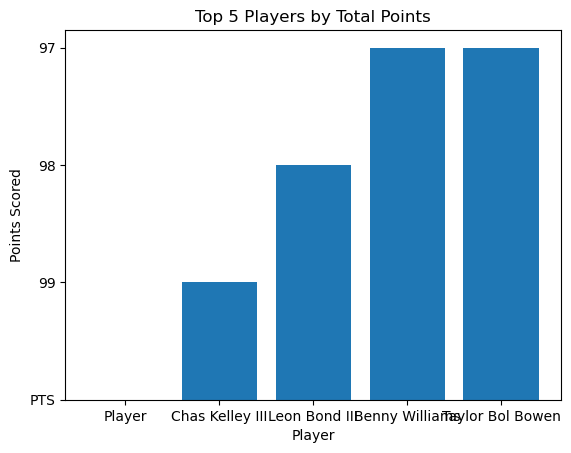

TypeError: 'value' must be an instance of str or bytes, not a float

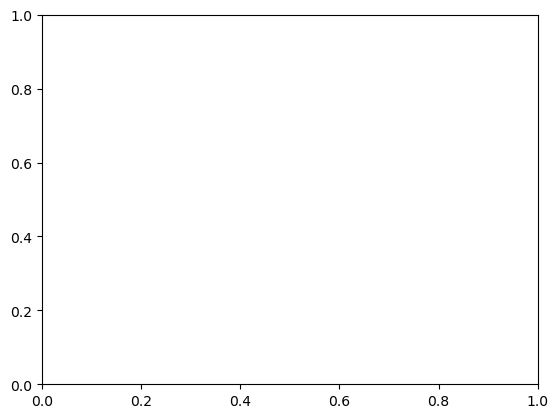

In [17]:
# Task 5: Extra Credit (Bonus)
import matplotlib.pyplot as plt

# Bar chart for top 5 players by total points
top_5_scorers = df_cleaned[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(5)
plt.bar(top_5_scorers['Player'], top_5_scorers['PTS'])
plt.title("Top 5 Players by Total Points")
plt.xlabel("Player")
plt.ylabel("Points Scored")
plt.show()

# Scatter plot and correlation between FG% and WS
plt.scatter(df_cleaned['FG%'], df_cleaned['WS'])
plt.title("Field Goal Percentage vs Win Shares")
plt.xlabel("Field Goal Percentage (FG%)")
plt.ylabel("Win Shares (WS)")
plt.show()

# Calculate correlation coefficient
correlation = df_cleaned[['FG%', 'WS']].corr().iloc[0, 1]
print("Correlation between FG% and WS:", correlation)